In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  # Para dividir los datos en entrenamiento y prueba
from sklearn.preprocessing import StandardScaler     # Para estandarizar los datos
from sklearn.metrics import confusion_matrix, classification_report  # Métricas de evaluación de modelos

# Opcionalmente, importa los algoritmos de machine learning que planeas utilizar
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:


# Ruta de la carpeta de archivos normales
ruta_normales = r'C:\Users\Usuario\Desktop\TECNICATURA\APRENDIZAJE AUTOMATICO\PROYECTO FALLAS\PROYECTO-DETECCION-DE-FALLA\cookiecutter-data-science\datos\NORMAL'

# Obtener la lista de archivos en la carpeta
archivos_normales = os.listdir(ruta_normales)

# Seleccionar los primeros 7 archivos
archivos_seleccionados_normales = archivos_normales[:7]

# Crear una lista para almacenar los DataFrames de cada archivo
dfs_normales = []

# Iterar sobre los archivos seleccionados y cargarlos en DataFrames
for archivo in archivos_seleccionados_normales:
    ruta_archivo = os.path.join(ruta_normales, archivo)
    df = pd.read_csv(ruta_archivo, header=None)  # Suponiendo que los archivos no tienen encabezado
    dfs_normales.append(df)

# Concatenar todos los DataFrames en uno solo
df_normales = pd.concat(dfs_normales, ignore_index=True)

# Mostrar las primeras filas del DataFrame para verificar
print("Datos de archivos normales:")
print(df_normales.head())


Datos de archivos normales:
        0         1         2         3        4         5        6         7
0  4.5595  0.175200  0.287210 -0.017751 -0.41565  0.032459 -0.11218 -0.128140
1  4.6038 -0.051295 -0.194050 -0.060071 -0.41809  0.036547 -0.11043  0.118310
2  4.5703 -0.969080  0.038033 -0.028329 -0.43081  0.041924 -0.14331 -0.071527
3  4.5870  0.891270  0.072973  0.007453 -0.40017  0.041090 -0.11984  0.043445
4  4.5887 -1.716000 -0.329290 -0.033063 -0.50281  0.040474 -0.25270  0.023901


In [3]:
# Rutas de las carpetas que contienen los archivos de desbalances
rutas_desbalances = [
    r'C:\Users\Usuario\Desktop\TECNICATURA\APRENDIZAJE AUTOMATICO\PROYECTO FALLAS\PROYECTO-DETECCION-DE-FALLA\cookiecutter-data-science\datos\DESBALANCES\6 GRAMOS',
    r'C:\Users\Usuario\Desktop\TECNICATURA\APRENDIZAJE AUTOMATICO\PROYECTO FALLAS\PROYECTO-DETECCION-DE-FALLA\cookiecutter-data-science\datos\DESBALANCES\10 GRAMOS',
    r'C:\Users\Usuario\Desktop\TECNICATURA\APRENDIZAJE AUTOMATICO\PROYECTO FALLAS\PROYECTO-DETECCION-DE-FALLA\cookiecutter-data-science\datos\DESBALANCES\15 GRAMOS',
    r'C:\Users\Usuario\Desktop\TECNICATURA\APRENDIZAJE AUTOMATICO\PROYECTO FALLAS\PROYECTO-DETECCION-DE-FALLA\cookiecutter-data-science\datos\DESBALANCES\20 GRAMOS',
    r'C:\Users\Usuario\Desktop\TECNICATURA\APRENDIZAJE AUTOMATICO\PROYECTO FALLAS\PROYECTO-DETECCION-DE-FALLA\cookiecutter-data-science\datos\DESBALANCES\25 GRAMOS',
    r'C:\Users\Usuario\Desktop\TECNICATURA\APRENDIZAJE AUTOMATICO\PROYECTO FALLAS\PROYECTO-DETECCION-DE-FALLA\cookiecutter-data-science\datos\DESBALANCES\30 GRAMOS',
    r'C:\Users\Usuario\Desktop\TECNICATURA\APRENDIZAJE AUTOMATICO\PROYECTO FALLAS\PROYECTO-DETECCION-DE-FALLA\cookiecutter-data-science\datos\DESBALANCES\35 GRAMOS'
]

# Lista para almacenar los DataFrames de los archivos de desbalances
dfs_desbalances = []

# Iterar sobre cada carpeta de desbalances
for ruta_carpeta_desbalance in rutas_desbalances:
    # Obtener la lista de archivos en la carpeta
    archivos_desbalance = os.listdir(ruta_carpeta_desbalance)

    # Seleccionar el primer archivo (puedes ajustar el criterio de selección si es necesario)
    if archivos_desbalance:
        archivo_seleccionado = archivos_desbalance[0]  # Seleccionar el primer archivo

        # Cargar el archivo seleccionado en un DataFrame
        ruta_archivo = os.path.join(ruta_carpeta_desbalance, archivo_seleccionado)
        df = pd.read_csv(ruta_archivo, header=None)  # Suponiendo que los archivos no tienen encabezado
        dfs_desbalances.append(df)

# Concatenar todos los DataFrames de desbalances en uno solo
df_desbalances = pd.concat(dfs_desbalances, ignore_index=True)

# Mostrar las primeras filas del DataFrame para verificar
print("\nDatos de archivos de desbalances:")
print(df_desbalances.head())



Datos de archivos de desbalances:
         0        1        2         3        4         5        6        7
0 -0.72045 -1.38060 -1.12120  0.043042  0.19377  0.017846 -0.88723  0.42433
1 -0.64913 -0.56770 -0.22977  0.051983  0.21621  0.024443 -0.53025 -0.29317
2 -0.68500 -1.65000 -1.24430 -0.232050  0.20017  0.023314 -0.69955  0.70456
3 -0.56136 -0.43616 -0.10885 -0.275050  0.23481  0.042759 -0.46237 -0.38232
4 -0.72766 -1.40620 -0.89527 -0.529050  0.22374  0.037663 -0.69903  0.64856


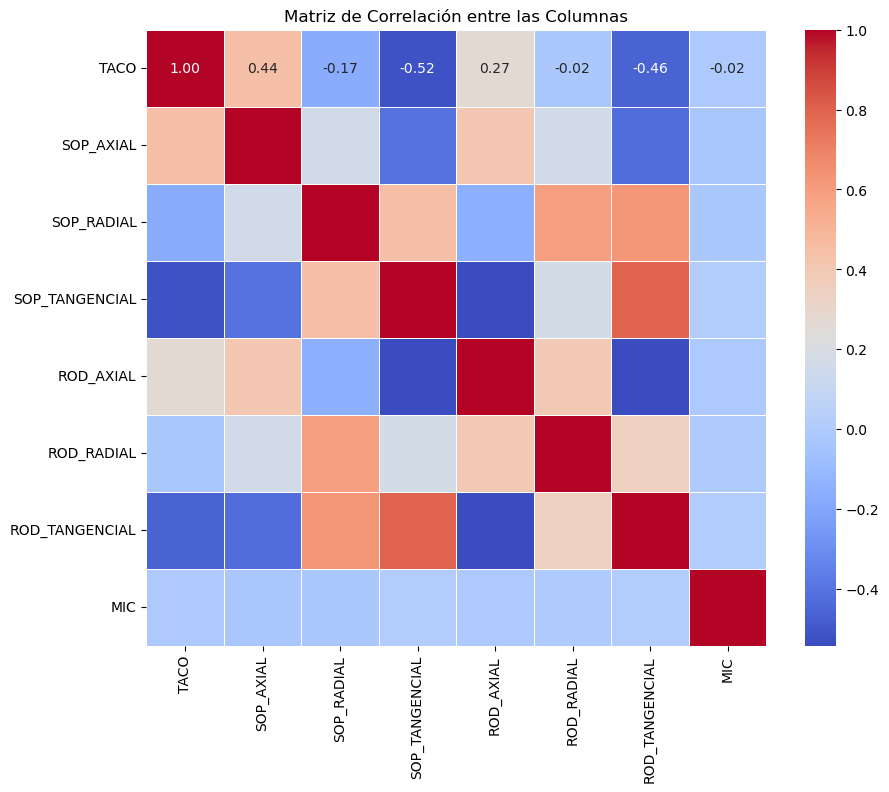

In [4]:


# Asignar nombres a las columnas según la especificación dada
df.columns = ['TACO', 'SOP_AXIAL', 'SOP_RADIAL', 'SOP_TANGENCIAL', 'ROD_AXIAL', 'ROD_RADIAL', 'ROD_TANGENCIAL', 'MIC']

# Calcular la matriz de correlación
matriz_correlacion = df.corr()

# Visualización de la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre las Columnas')
plt.show()


In [5]:
# Contar el número de muestras en cada DataFrame

# DataFrame para archivos normales
print("Archivos Normales:")
for i, df_normal in enumerate(dfs_normales, 1):
    print(f"DataFrame {i}: {df_normal.shape[0]} filas")

# DataFrame para archivos de desbalance
print("\nArchivos de Desbalance:")
for i, df_desbalance in enumerate(dfs_desbalances, 1):
    print(f"DataFrame {i}: {df_desbalance.shape[0]} filas")


Archivos Normales:
DataFrame 1: 250000 filas
DataFrame 2: 250000 filas
DataFrame 3: 250000 filas
DataFrame 4: 250000 filas
DataFrame 5: 250000 filas
DataFrame 6: 250000 filas
DataFrame 7: 250000 filas

Archivos de Desbalance:
DataFrame 1: 250000 filas
DataFrame 2: 250000 filas
DataFrame 3: 250000 filas
DataFrame 4: 250000 filas
DataFrame 5: 250000 filas
DataFrame 6: 250000 filas
DataFrame 7: 250000 filas


<Figure size 1200x1000 with 0 Axes>

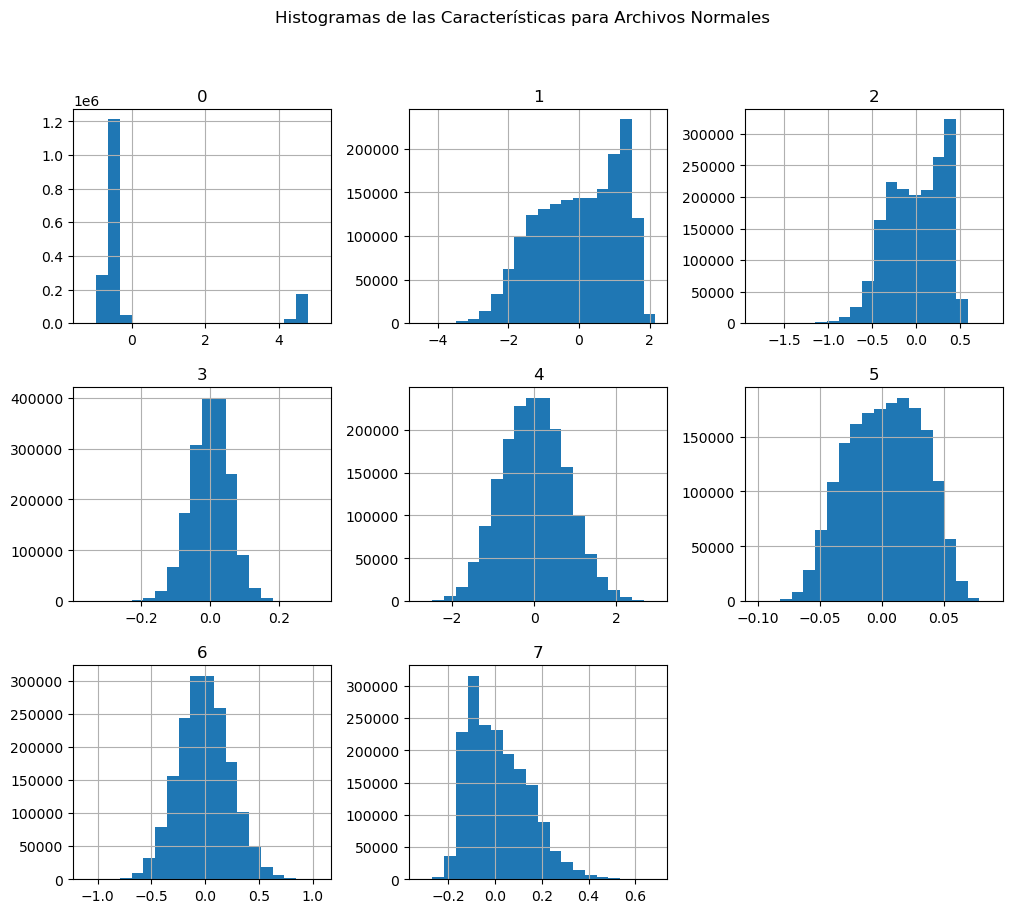

<Figure size 1200x1000 with 0 Axes>

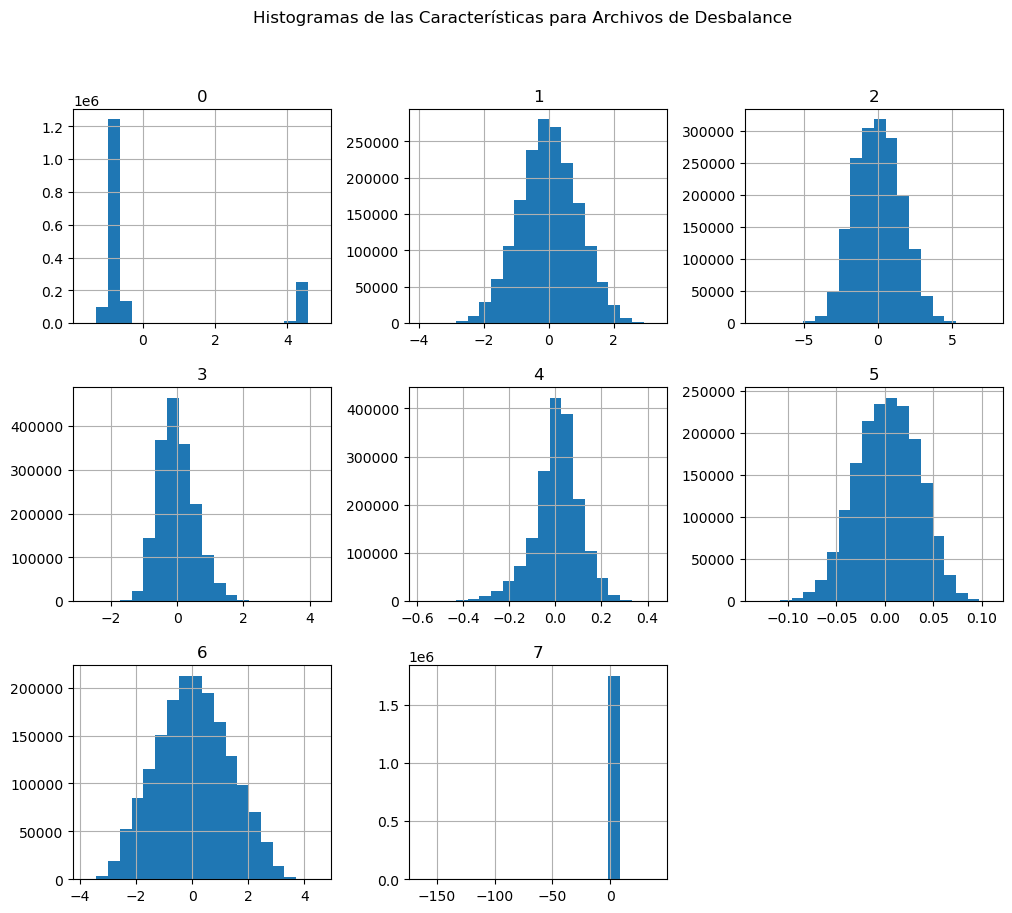

In [6]:
# Histogramas para archivos normales
plt.figure(figsize=(12, 10))
df_normales.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histogramas de las Características para Archivos Normales')
plt.show()

# Histogramas para archivos de desbalance
plt.figure(figsize=(12, 10))
df_desbalances.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histogramas de las Características para Archivos de Desbalance')
plt.show()


<Figure size 1200x800 with 0 Axes>

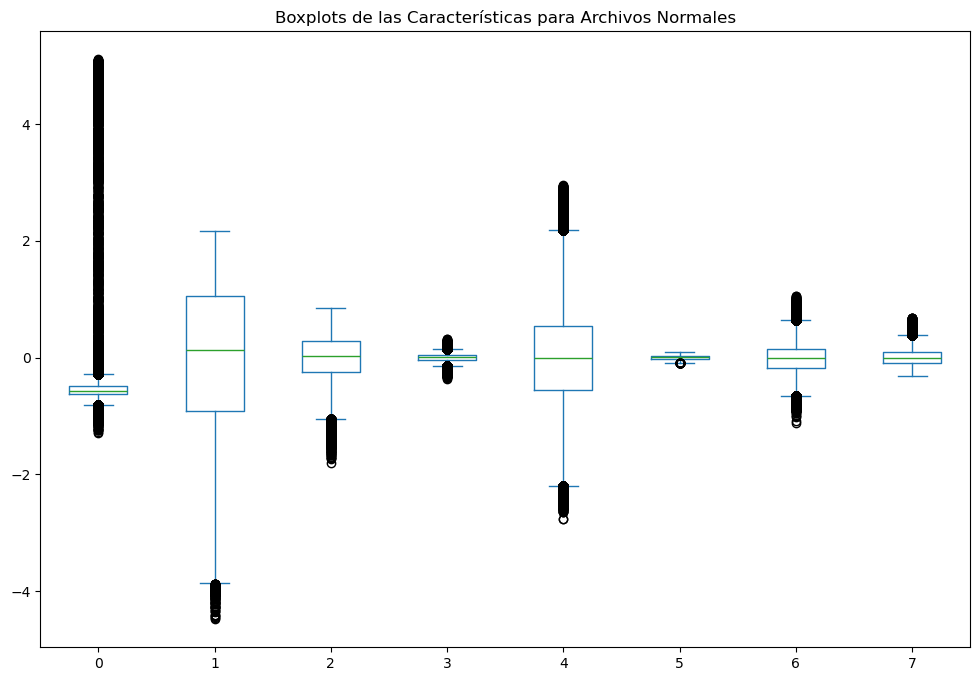

<Figure size 1200x800 with 0 Axes>

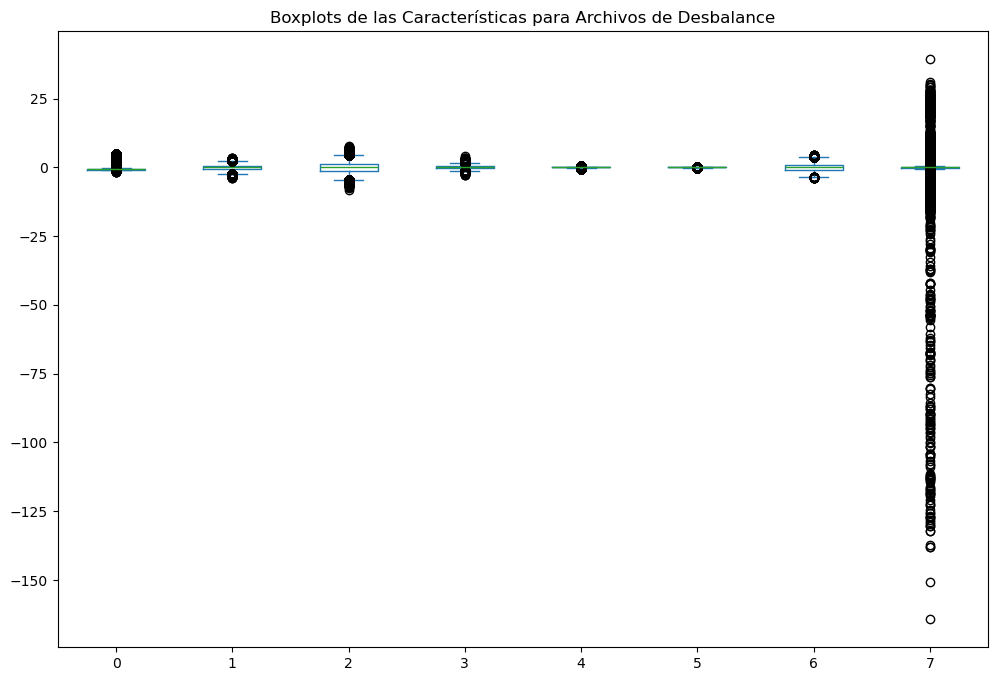

In [7]:
# Boxplots para archivos normales
plt.figure(figsize=(12, 8))
df_normales.plot(kind='box', figsize=(12, 8))
plt.title('Boxplots de las Características para Archivos Normales')
plt.show()

# Boxplots para archivos de desbalance
plt.figure(figsize=(12, 8))
df_desbalances.plot(kind='box', figsize=(12, 8))
plt.title('Boxplots de las Características para Archivos de Desbalance')
plt.show()


In [8]:
# Eliminar la columna en la posición 7 (índice 7) de df_normales
if len(df_normales.columns) > 7:  # Verificar que hay al menos 8 columnas
    df_normales.drop(df_normales.columns[7], axis=1, inplace=True)
else:
    print("No se puede eliminar la séptima columna porque no hay suficientes columnas en df_normales.")

# Eliminar la columna en la posición 7 (índice 7) de df_desbalances
if len(df_desbalances.columns) > 7:  # Verificar que hay al menos 8 columnas
    df_desbalances.drop(df_desbalances.columns[7], axis=1, inplace=True)
else:
    print("No se puede eliminar la séptima columna porque no hay suficientes columnas en df_desbalances.")


In [9]:
# Imprimir las columnas actuales de df_normales y df_desbalances
print("Columnas de df_normales después de eliminar 'MIC':")
print(df_normales.columns)

print("\nColumnas de df_desbalances después de eliminar 'MIC':")
print(df_desbalances.columns)


Columnas de df_normales después de eliminar 'MIC':
Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

Columnas de df_desbalances después de eliminar 'MIC':
Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')


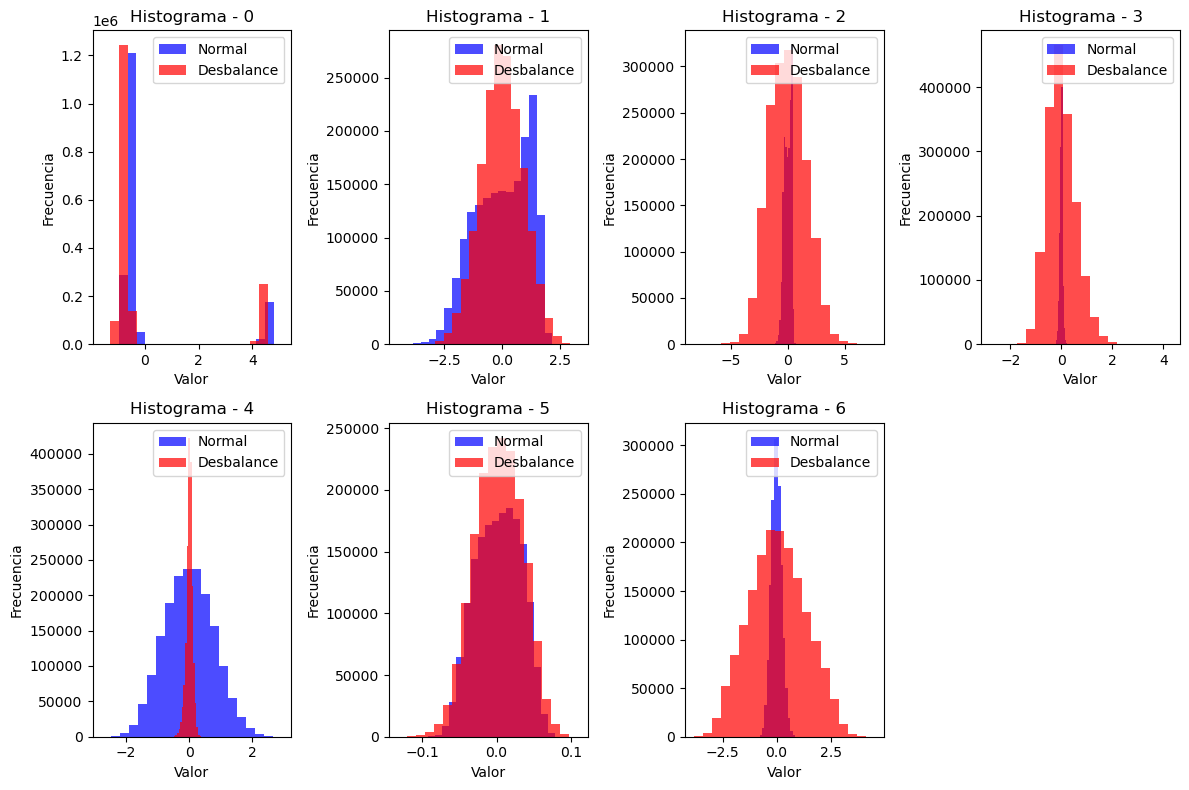

In [10]:


# Definir el número de columnas y filas para los subplots
n_cols = 4  # Ajusta según la cantidad de columnas deseadas
n_rows = (df_normales.shape[1] // n_cols) + 1

# Comparación de histogramas entre Normal y Desbalance
plt.figure(figsize=(12, 8))

# Histogramas para todas las columnas
for i, col in enumerate(df_normales.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.hist(df_normales[col], bins=20, alpha=0.7, color='blue', label='Normal')
    plt.hist(df_desbalances[col], bins=20, alpha=0.7, color='red', label='Desbalance')
    plt.title(f'Histograma - {col}')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.legend()

plt.tight_layout()
plt.show()


In [11]:
# Verificar valores faltantes en df_normales
missing_normales = df_normales.isnull().sum()
print("Valores faltantes en df_normales:")
print(missing_normales)

# Verificar valores faltantes en df_desbalances
missing_desbalances = df_desbalances.isnull().sum()
print("\nValores faltantes en df_desbalances:")
print(missing_desbalances)


Valores faltantes en df_normales:
0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64

Valores faltantes en df_desbalances:
0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64


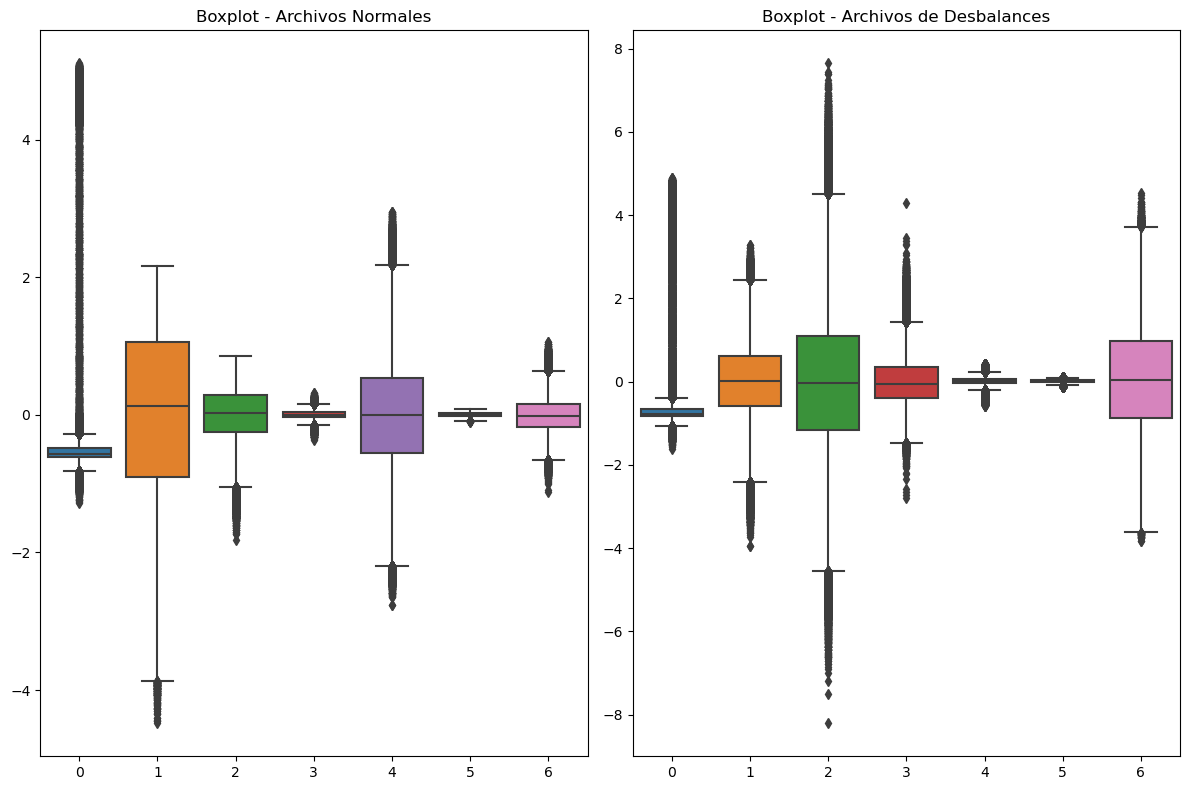

In [12]:
# Usando boxplots para identificar valores atípicos en ambos DataFrames
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_normales)
plt.title("Boxplot - Archivos Normales")

plt.subplot(1, 2, 2)
sns.boxplot(data=df_desbalances)
plt.title("Boxplot - Archivos de Desbalances")

plt.tight_layout()
plt.show()


In [13]:
# Etiquetar datos normales
df_normales['Etiqueta'] = 0  # Etiqueta 0 para datos normales

# Etiquetar datos de desbalance
df_desbalances['Etiqueta'] = 1  # Etiqueta 1 para datos de desbalance

# Verificar que se hayan añadido las etiquetas correctamente
print("Datos normales con etiquetas:")
print(df_normales.head())

print("\nDatos de desbalance con etiquetas:")
print(df_desbalances.head())


Datos normales con etiquetas:
        0         1         2         3        4         5        6  Etiqueta
0  4.5595  0.175200  0.287210 -0.017751 -0.41565  0.032459 -0.11218         0
1  4.6038 -0.051295 -0.194050 -0.060071 -0.41809  0.036547 -0.11043         0
2  4.5703 -0.969080  0.038033 -0.028329 -0.43081  0.041924 -0.14331         0
3  4.5870  0.891270  0.072973  0.007453 -0.40017  0.041090 -0.11984         0
4  4.5887 -1.716000 -0.329290 -0.033063 -0.50281  0.040474 -0.25270         0

Datos de desbalance con etiquetas:
         0        1        2         3        4         5        6  Etiqueta
0 -0.72045 -1.38060 -1.12120  0.043042  0.19377  0.017846 -0.88723         1
1 -0.64913 -0.56770 -0.22977  0.051983  0.21621  0.024443 -0.53025         1
2 -0.68500 -1.65000 -1.24430 -0.232050  0.20017  0.023314 -0.69955         1
3 -0.56136 -0.43616 -0.10885 -0.275050  0.23481  0.042759 -0.46237         1
4 -0.72766 -1.40620 -0.89527 -0.529050  0.22374  0.037663 -0.69903         1


In [14]:


# Dividir datos normales en entrenamiento y prueba
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(
    df_normales.drop(columns=['Etiqueta']),  # features de los datos normales
    df_normales['Etiqueta'],  # etiquetas de los datos normales
    test_size=0.25,  # 25% para prueba, 75% para entrenamiento
    random_state=42  # semilla aleatoria para reproducibilidad
)

# Dividir datos de desbalance en entrenamiento y prueba
X_train_desbalance, X_test_desbalance, y_train_desbalance, y_test_desbalance = train_test_split(
    df_desbalances.drop(columns=['Etiqueta']),  # features de los datos desbalanceados
    df_desbalances['Etiqueta'],  # etiquetas de los datos desbalanceados
    test_size=0.25,  # 25% para prueba, 75% para entrenamiento
    random_state=42  # semilla aleatoria para reproducibilidad
)

# Verificar las dimensiones de los conjuntos de entrenamiento y prueba
print(f'Datos de entrenamiento (normales): {X_train_norm.shape}')
print(f'Datos de prueba (normales): {X_test_norm.shape}')
print(f'Datos de entrenamiento (desbalance): {X_train_desbalance.shape}')
print(f'Datos de prueba (desbalance): {X_test_desbalance.shape}')


Datos de entrenamiento (normales): (1312500, 7)
Datos de prueba (normales): (437500, 7)
Datos de entrenamiento (desbalance): (1312500, 7)
Datos de prueba (desbalance): (437500, 7)
